# Preparation

In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# pip install graphviz

# Read Data

In [4]:
df = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/Data_Intern ASJ.xlsx")
# sheet_name="Sumber Data"
# df = df.drop(columns=['TanggalJamMulai1','TanggalJamSelesai1'])
df.head()

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,...,Menit2,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline
0,0,0,1,101,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,-0.006297,-1,-0.272161,1
1,1,1,1,48,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,-0.006297,-1,-0.272161,1
2,2,2,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,-0.006297,-1,-0.272161,1
3,3,3,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,-0.006297,-1,-0.272161,1
4,4,4,1,100,234720752,Product 2,6,3,20,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.279841,-1,7.588125,-1


In [5]:
df['Oplah'].describe()

count      1834.000000
mean      34530.446020
std       37937.711916
min           0.000000
25%        4000.000000
50%       20000.000000
75%       64745.000000
max      200000.000000
Name: Oplah, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0.1       1834 non-null   int64         
 1   Unnamed: 0         1834 non-null   int64         
 2   Mesin              1834 non-null   int64         
 3   KodePekerjaan      1834 non-null   int64         
 4   NoOrder            1834 non-null   int64         
 5   Judul              1834 non-null   object        
 6   NoKatern1          1834 non-null   int64         
 7   NoKatern2          1834 non-null   int64         
 8   Warna              1834 non-null   int64         
 9   Teller             215 non-null    float64       
 10  HasilRusak         0 non-null      float64       
 11  compute_0014       1834 non-null   int64         
 12  NamaMesin          1834 non-null   int64         
 13  NamaPekerjaan      1834 non-null   int64         
 14  compute_

In [8]:
# df['TanggalJamMulai'] = df['TanggalMulai'].astype(str) + ' ' + df['JamMulai']
# df['TanggalJamSelesai'] = df['TanggalSelesai'].astype(str) + ' ' + df['JamSelesai']

# df

In [10]:
# df['TanggalJamMulai'] = pd.to_datetime(df['TanggalJamMulai'])
# df['TanggalJamSelesai'] = pd.to_datetime(df['TanggalJamSelesai'])

# df.info()

# Cleaning Data

## Label Encoding

In [11]:
df_new = df

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df_new['Judul'])

df_new.drop('Judul', axis=1, inplace=True)
df_new['Judul'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NoKatern1'])

df_new.drop('NoKatern1', axis=1, inplace=True)
df_new['NoKatern1'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NoKatern2'])

df_new.drop('NoKatern2', axis=1, inplace=True)
df_new['NoKatern2'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NamaPekerjaan'])

df_new.drop('NamaPekerjaan', axis=1, inplace=True)
df_new['NamaPekerjaan'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NamaMesin'])

df_new.drop('NamaMesin', axis=1, inplace=True)
df_new['NamaMesin'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['Keterangan'])

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0.1       1834 non-null   int64         
 1   Unnamed: 0         1834 non-null   int64         
 2   Mesin              1834 non-null   int64         
 3   KodePekerjaan      1834 non-null   int64         
 4   NoOrder            1834 non-null   int64         
 5   Warna              1834 non-null   int64         
 6   Teller             215 non-null    float64       
 7   HasilRusak         0 non-null      float64       
 8   compute_0014       1834 non-null   int64         
 9   compute_0017       0 non-null      float64       
 10  compute_0018       0 non-null      float64       
 11  compute_0019       0 non-null      float64       
 12  compute_0020       0 non-null      float64       
 13  compute_0021       0 non-null      float64       
 14  compute_

In [14]:
# df_new = df.select_dtypes(exclude=['object'])
# # df_date_selesai = df_date_selesai.drop(columns = ['KodePekerjaan','NoOrder','Mesin','NIK2','TanggalJamMulai1','Produksi','compute_0026','compute_0027'])
# df_new

## Drop Unused Columns

In [16]:
df_new = df_new.drop(columns = ['HasilRusak','NIK4','NIK5','NIK6','ket 2','NIK1',
                                'NIK2','NIK4','NIK5','NIK6','Teller','TanggalJamMulai','TanggalJamSelesai',
                                'TanggalSelesai','TanggalMulai','KodePekerjaan','NoOrder','Produksi','Keterangan'])
df_new = df_new.select_dtypes(exclude=['object'])
df_new.fillna(0,inplace=True)
# df_new = df_new.drop(columns = ['Unnamed: 42','\'])

In [17]:
df_new.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Mesin             0
Warna             0
compute_0014      0
compute_0017      0
compute_0018      0
compute_0019      0
compute_0020      0
compute_0021      0
compute_0022      0
compute_0023      0
compute_0024      0
compute_0026      0
compute_0027      0
compute_0028      0
compute_0029      0
Shift             0
JamMulai          0
JamSelesai        0
Oplah             0
Unnamed: 40       0
Trax              0
Menit2            0
Unnamed: 43       0
Unnamed: 44       0
anomaly_scores    0
anomaly           0
z-score           0
baseline          0
Judul             0
NoKatern1         0
NoKatern2         0
NamaPekerjaan     0
NamaMesin         0
dtype: int64

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    1834 non-null   int64  
 1   Unnamed: 0      1834 non-null   int64  
 2   Mesin           1834 non-null   int64  
 3   Warna           1834 non-null   int64  
 4   compute_0014    1834 non-null   int64  
 5   compute_0017    1834 non-null   float64
 6   compute_0018    1834 non-null   float64
 7   compute_0019    1834 non-null   float64
 8   compute_0020    1834 non-null   float64
 9   compute_0021    1834 non-null   float64
 10  compute_0022    1834 non-null   float64
 11  compute_0023    1834 non-null   float64
 12  compute_0024    1834 non-null   float64
 13  compute_0026    1834 non-null   int64  
 14  compute_0027    1834 non-null   int64  
 15  compute_0028    1834 non-null   float64
 16  compute_0029    1834 non-null   float64
 17  Shift           1834 non-null   i

In [19]:
# plt.figure(figsize=(14,6))
# sns.boxplot(x='Warna', y='Oplah',hue='Warna',data=df_new,palette='rainbow')
# plt.title('Box plot of charges vs children');

# Modelling

In [20]:
X = df_new.drop('Judul', axis=1)
y = df_new['Judul']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# X_train.info()
# # X_train = X_train.drop(columns = ['TanggalJamSelesai']

## Random Forest

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 103 to 1400
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    1283 non-null   int64  
 1   Unnamed: 0      1283 non-null   int64  
 2   Mesin           1283 non-null   int64  
 3   Warna           1283 non-null   int64  
 4   compute_0014    1283 non-null   int64  
 5   compute_0017    1283 non-null   float64
 6   compute_0018    1283 non-null   float64
 7   compute_0019    1283 non-null   float64
 8   compute_0020    1283 non-null   float64
 9   compute_0021    1283 non-null   float64
 10  compute_0022    1283 non-null   float64
 11  compute_0023    1283 non-null   float64
 12  compute_0024    1283 non-null   float64
 13  compute_0026    1283 non-null   int64  
 14  compute_0027    1283 non-null   int64  
 15  compute_0028    1283 non-null   float64
 16  compute_0029    1283 non-null   float64
 17  Shift           1283 non-null   int6

In [23]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = rf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9872958257713249


In [26]:
# conda install python-graphviz


In [27]:
# pip install --upgrade sklearn
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [28]:
# !pip install --upgrade sklearn

## Linear Regression

In [29]:
# df_new2 = df_new[['Oplah','Judul','NamaPekerjaan','NamaMesin','Warna','Shift','Trax']]


In [30]:
# ## Regresi Linier Tenaga Kerja <-- Jumlah Proyek + Tahun (without a constant)

# import statsmodels.api as sm

# X = df_new2.iloc[:,1:21]
# #X = sm.add_constant(X) # add an intercept (beta_0) to our model
# y = df_new2['Oplah']

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

## Isolation Forest

In [47]:
df_raw = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/Data_Intern ASJ.xlsx")
# df_raw = df_raw.drop(columns=['TanggalJamMulai1','TanggalJamSelesai1'])
df_raw.head()

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,...,Menit2,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline
0,0,0,1,101,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,-0.006297,-1,-0.272161,1
1,1,1,1,48,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,-0.006297,-1,-0.272161,1
2,2,2,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,-0.006297,-1,-0.272161,1
3,3,3,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,-0.006297,-1,-0.272161,1
4,4,4,1,100,234720752,Product 2,6,3,20,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.279841,-1,7.588125,-1


In [49]:
# df_raw['TanggalJamMulai'] = df_raw['TanggalMulai'].astype(str) + ' ' + df_raw['JamMulai']
# df_raw['TanggalJamSelesai'] = df_raw['TanggalSelesai'].astype(str) + ' ' + df_raw['JamSelesai']


# df_raw['TanggalJamMulai'] = pd.to_datetime(df_raw['TanggalJamMulai'])
# df_raw['TanggalJamSelesai'] = pd.to_datetime(df_raw['TanggalJamSelesai'])

# df_raw.head()

In [50]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0.1       1834 non-null   int64         
 1   Unnamed: 0         1834 non-null   int64         
 2   Mesin              1834 non-null   int64         
 3   KodePekerjaan      1834 non-null   int64         
 4   NoOrder            1834 non-null   int64         
 5   Judul              1834 non-null   object        
 6   NoKatern1          1834 non-null   int64         
 7   NoKatern2          1834 non-null   int64         
 8   Warna              1834 non-null   int64         
 9   Teller             215 non-null    float64       
 10  HasilRusak         0 non-null      float64       
 11  compute_0014       1834 non-null   int64         
 12  NamaMesin          1834 non-null   int64         
 13  NamaPekerjaan      1834 non-null   int64         
 14  compute_

In [51]:
from sklearn.ensemble import IsolationForest 

modelif = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), max_features=1.0)
modelif.fit(df_new[['Oplah']])

IsolationForest(contamination=0.2)

In [52]:
df_raw['anomaly_scores']=modelif.decision_function(df_new[['Oplah']])
df_raw['anomaly']=modelif.predict(df_new[['Oplah']])
df_new['anomaly_scores']=modelif.decision_function(df_new[['Oplah']])
df_new['anomaly']=modelif.predict(df_new[['Oplah']])
df_raw.head()

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,...,Menit2,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline
0,0,0,1,101,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.021383,1,-0.272161,1
1,1,1,1,48,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.021383,1,-0.272161,1
2,2,2,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.021383,1,-0.272161,1
3,3,3,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.021383,1,-0.272161,1
4,4,4,1,100,234720752,Product 2,6,3,20,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.273694,-1,7.588125,-1


In [53]:
# sns.lmplot(x='Oplah',y='anomaly_scores',data=df_raw,aspect=2,height=6)
# plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
# plt.ylabel('Insurance Charges: as Dependent variable')
# plt.title('Charge Vs BMI');

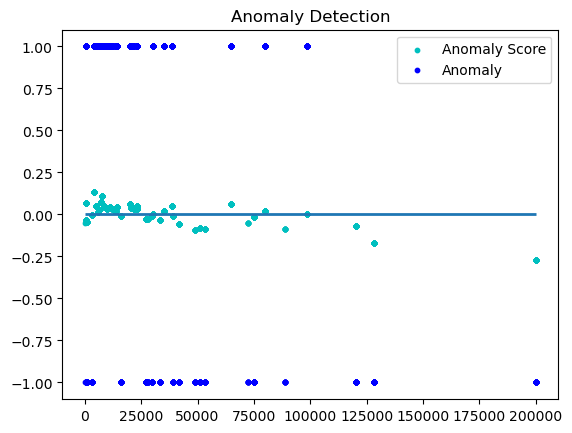

In [54]:
plt.scatter(df_raw['Oplah'],
            df_raw['anomaly_scores'],
            color="c", s=10,
            label='Anomaly Score')
 
# plotting residual errors in test data
plt.scatter(df_raw['Oplah'],
            df_raw['anomaly'],
            color="blue", s=10,
            label='Anomaly')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=df['Oplah'].max(), linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Anomaly Detection")
 
# method call for showing the plot
plt.show()

In [55]:
pd.value_counts(df_raw['anomaly'])

anomaly
 1    1536
-1     298
Name: count, dtype: int64

<Axes: xlabel='anomaly', ylabel='count'>

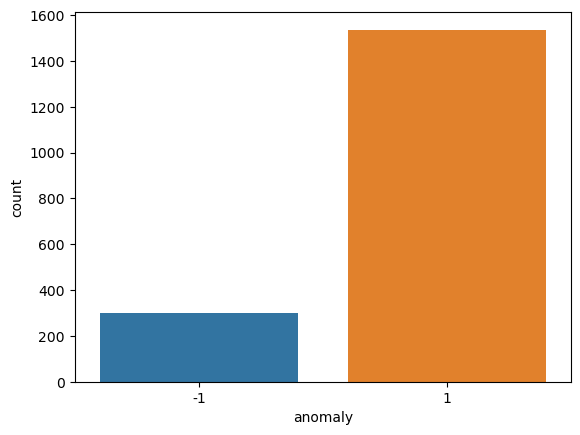

In [56]:
sns.countplot(x='anomaly', data=df_raw)

## Median Absolute Deviation

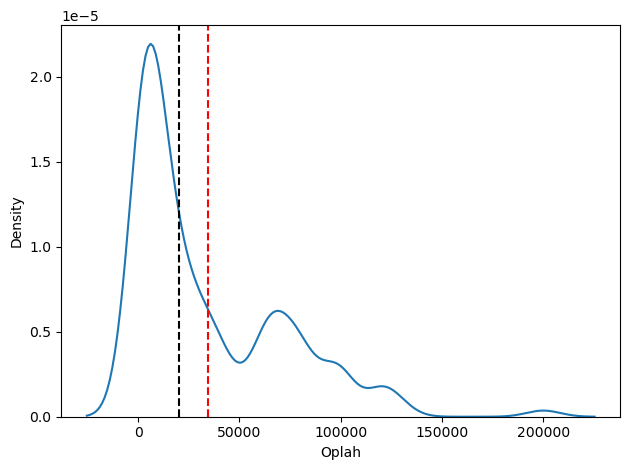

In [57]:
import seaborn as sns

sns.kdeplot(df_raw['Oplah']);
plt.grid(False)
plt.axvline(20000, 0, 1, c='black', ls='--')
plt.axvline(34530.44601962923, 0, 1, c='red', ls='--')

plt.tight_layout()

In [58]:
pd.value_counts(df_raw['Oplah'])

Oplah
4000      329
64745     174
492       125
7500      106
98399     105
80000     102
38650      63
120100     55
7000       53
20000      50
75000      46
14347      43
35000      42
4710       41
23034      32
30206      26
20965      20
23115      19
6060       18
128193     17
11178      17
27242      17
10000      15
200000     14
23185      14
10968      14
21843      13
20360      13
16187      13
41649      13
8307       12
400        12
51018      12
9852       12
29724      12
39066      12
1000       12
3000       12
53299      11
33167      11
21356      11
11768      11
12362      10
13605      10
49011      10
8370        9
5661        9
28029       7
12210       7
88962       6
11124       6
72319       5
13544       4
8340        1
0           1
Name: count, dtype: int64

In [59]:
# de = pd.read_csv("C:/Users/ASUS/Downloads/ec2_cpu_utilization_24ae8d.csv")
# de

In [60]:
# mean = np.median(de['value'])
# print(mean)

In [61]:
# df_raw['Oplah'].median()

In [62]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df_raw['Oplah'])
median = np.median(df_raw['Oplah'])
mean = np.mean(df_raw['Oplah'])

print(mad)
print(median)
print(mean)

def compute_robust_z_score(x):
    return 0.6745*(x-median)/mad

16000.0
20000.0
34530.44601962923


In [63]:
df_raw['z-score'] = df_raw['Oplah'].apply(compute_robust_z_score)
df_new['z-score'] = df_raw['Oplah'].apply(compute_robust_z_score)

df_raw.head()

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,...,Menit2,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline
0,0,0,1,101,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.021383,1,-0.272161,1
1,1,1,1,48,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.021383,1,-0.272161,1
2,2,2,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.021383,1,-0.272161,1
3,3,3,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.021383,1,-0.272161,1
4,4,4,1,100,234720752,Product 2,6,3,20,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.273694,-1,7.588125,-1


In [64]:
# df_new

In [65]:
df_raw['z-score'].value_counts()

z-score
-0.674500    329
 1.886281    174
-0.822384    125
-0.526953    106
 3.305008    105
 2.529375    102
 0.786214     63
 4.219841     55
-0.548031     53
 0.000000     50
 2.318594     46
-0.238309     43
 0.632344     42
-0.644569     41
 0.127902     32
 0.430247     26
 0.040681     20
 0.131317     19
-0.587658     18
 4.561011     17
-0.371902     17
 0.305296     17
-0.421563     15
 7.588125     14
 0.134268     14
-0.380755     14
 0.077694     13
 0.015176     13
-0.160742     13
 0.912641     13
-0.492933     12
-0.826262     12
 1.307603     12
-0.427802     12
 0.409927     12
 0.803751     12
-0.800969     12
-0.716656     12
 1.403761     11
 0.555071     11
 0.057164     11
-0.347030     11
-0.321989     10
-0.269589     10
 1.222995     10
-0.490277      9
-0.604478      9
 0.338473      7
-0.328397      7
 2.907179      6
-0.374179      6
 2.205573      5
-0.272161      4
-0.491542      1
-0.843125      1
Name: count, dtype: int64

In [66]:
df_raw['baseline'] = 1
df_new['baseline'] = 1

df_raw.loc[df_raw['z-score'] >= 3.5, 'baseline'] = -1
df_raw.loc[df_raw['z-score'] <= -3.5, 'baseline'] = -1
df_new.loc[df_new['z-score'] >= 3.5, 'baseline'] = -1
df_new.loc[df_new['z-score'] <= -3.5, 'baseline'] = -1

In [67]:
anomalies_timestamp = [
    "2024-01-02 07:01:45"
    "2024-01-03 23:45:01"
]

In [68]:
# df_raw['TanggalJamMulai1'] = pd.to_datetime(df['TanggalJamMulai1'])
# df_raw['TanggalJamSelesai1'] = pd.to_datetime(df['TanggalJamSelesai1'])
# df_raw.head()

In [69]:
df_raw['is_anomaly'] = 1

for each in anomalies_timestamp:
    df_raw.loc[df_raw['TanggalJamMulai'] == each, 'is_anomaly'] = -1
    
df_raw.head()

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,0,0,1,101,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.021383,1,-0.272161,1,1
1,1,1,1,48,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.021383,1,-0.272161,1,1
2,2,2,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.021383,1,-0.272161,1,1
3,3,3,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.021383,1,-0.272161,1,1
4,4,4,1,100,234720752,Product 2,6,3,20,NaN,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.273694,-1,7.588125,-1,1


In [70]:
anomaly_df = df_raw.loc[df_raw['is_anomaly'] == -1]
inlier_df = df_raw.loc[df_raw['is_anomaly'] == 1]
df_raw

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,0,0,1,101,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.021383,1,-0.272161,1,1
1,1,1,1,48,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.021383,1,-0.272161,1,1
2,2,2,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.021383,1,-0.272161,1,1
3,3,3,1,0,234710321,Product 1,9,5,44,NaN,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.021383,1,-0.272161,1,1
4,4,4,1,100,234720752,Product 2,6,3,20,NaN,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.273694,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1829,1829,1,1,244720360,Product 59,2,4,44,NaN,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.051144,1,-0.644569,1,1
1830,1830,1830,1,6,244720360,Product 59,2,4,44,NaN,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.051144,1,-0.644569,1,1
1831,1831,1831,1,500,244720360,Product 59,2,4,44,2100.0,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.051144,1,-0.644569,1,1
1832,1832,1832,1,53,244720360,Product 59,2,4,44,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.051144,1,-0.644569,1,1


In [71]:
# df_raw['is_anomaly'].value_counts()

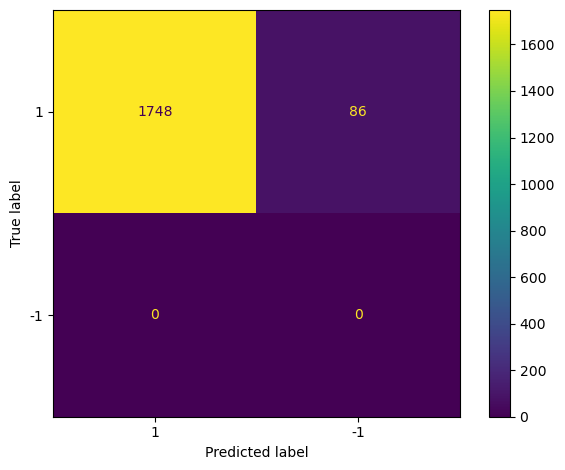

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_raw['is_anomaly'], df_raw['baseline'], labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

In [73]:
# df_raw.to_excel('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc.xlsx')


In [74]:
# df_raw.to_csv('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc.csv')

## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=5)

model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [76]:
modelif

IsolationForest(contamination=0.2)

In [77]:
# # Export the first three decision trees from the forest


# for i in range(3):
#     tree = modelif.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

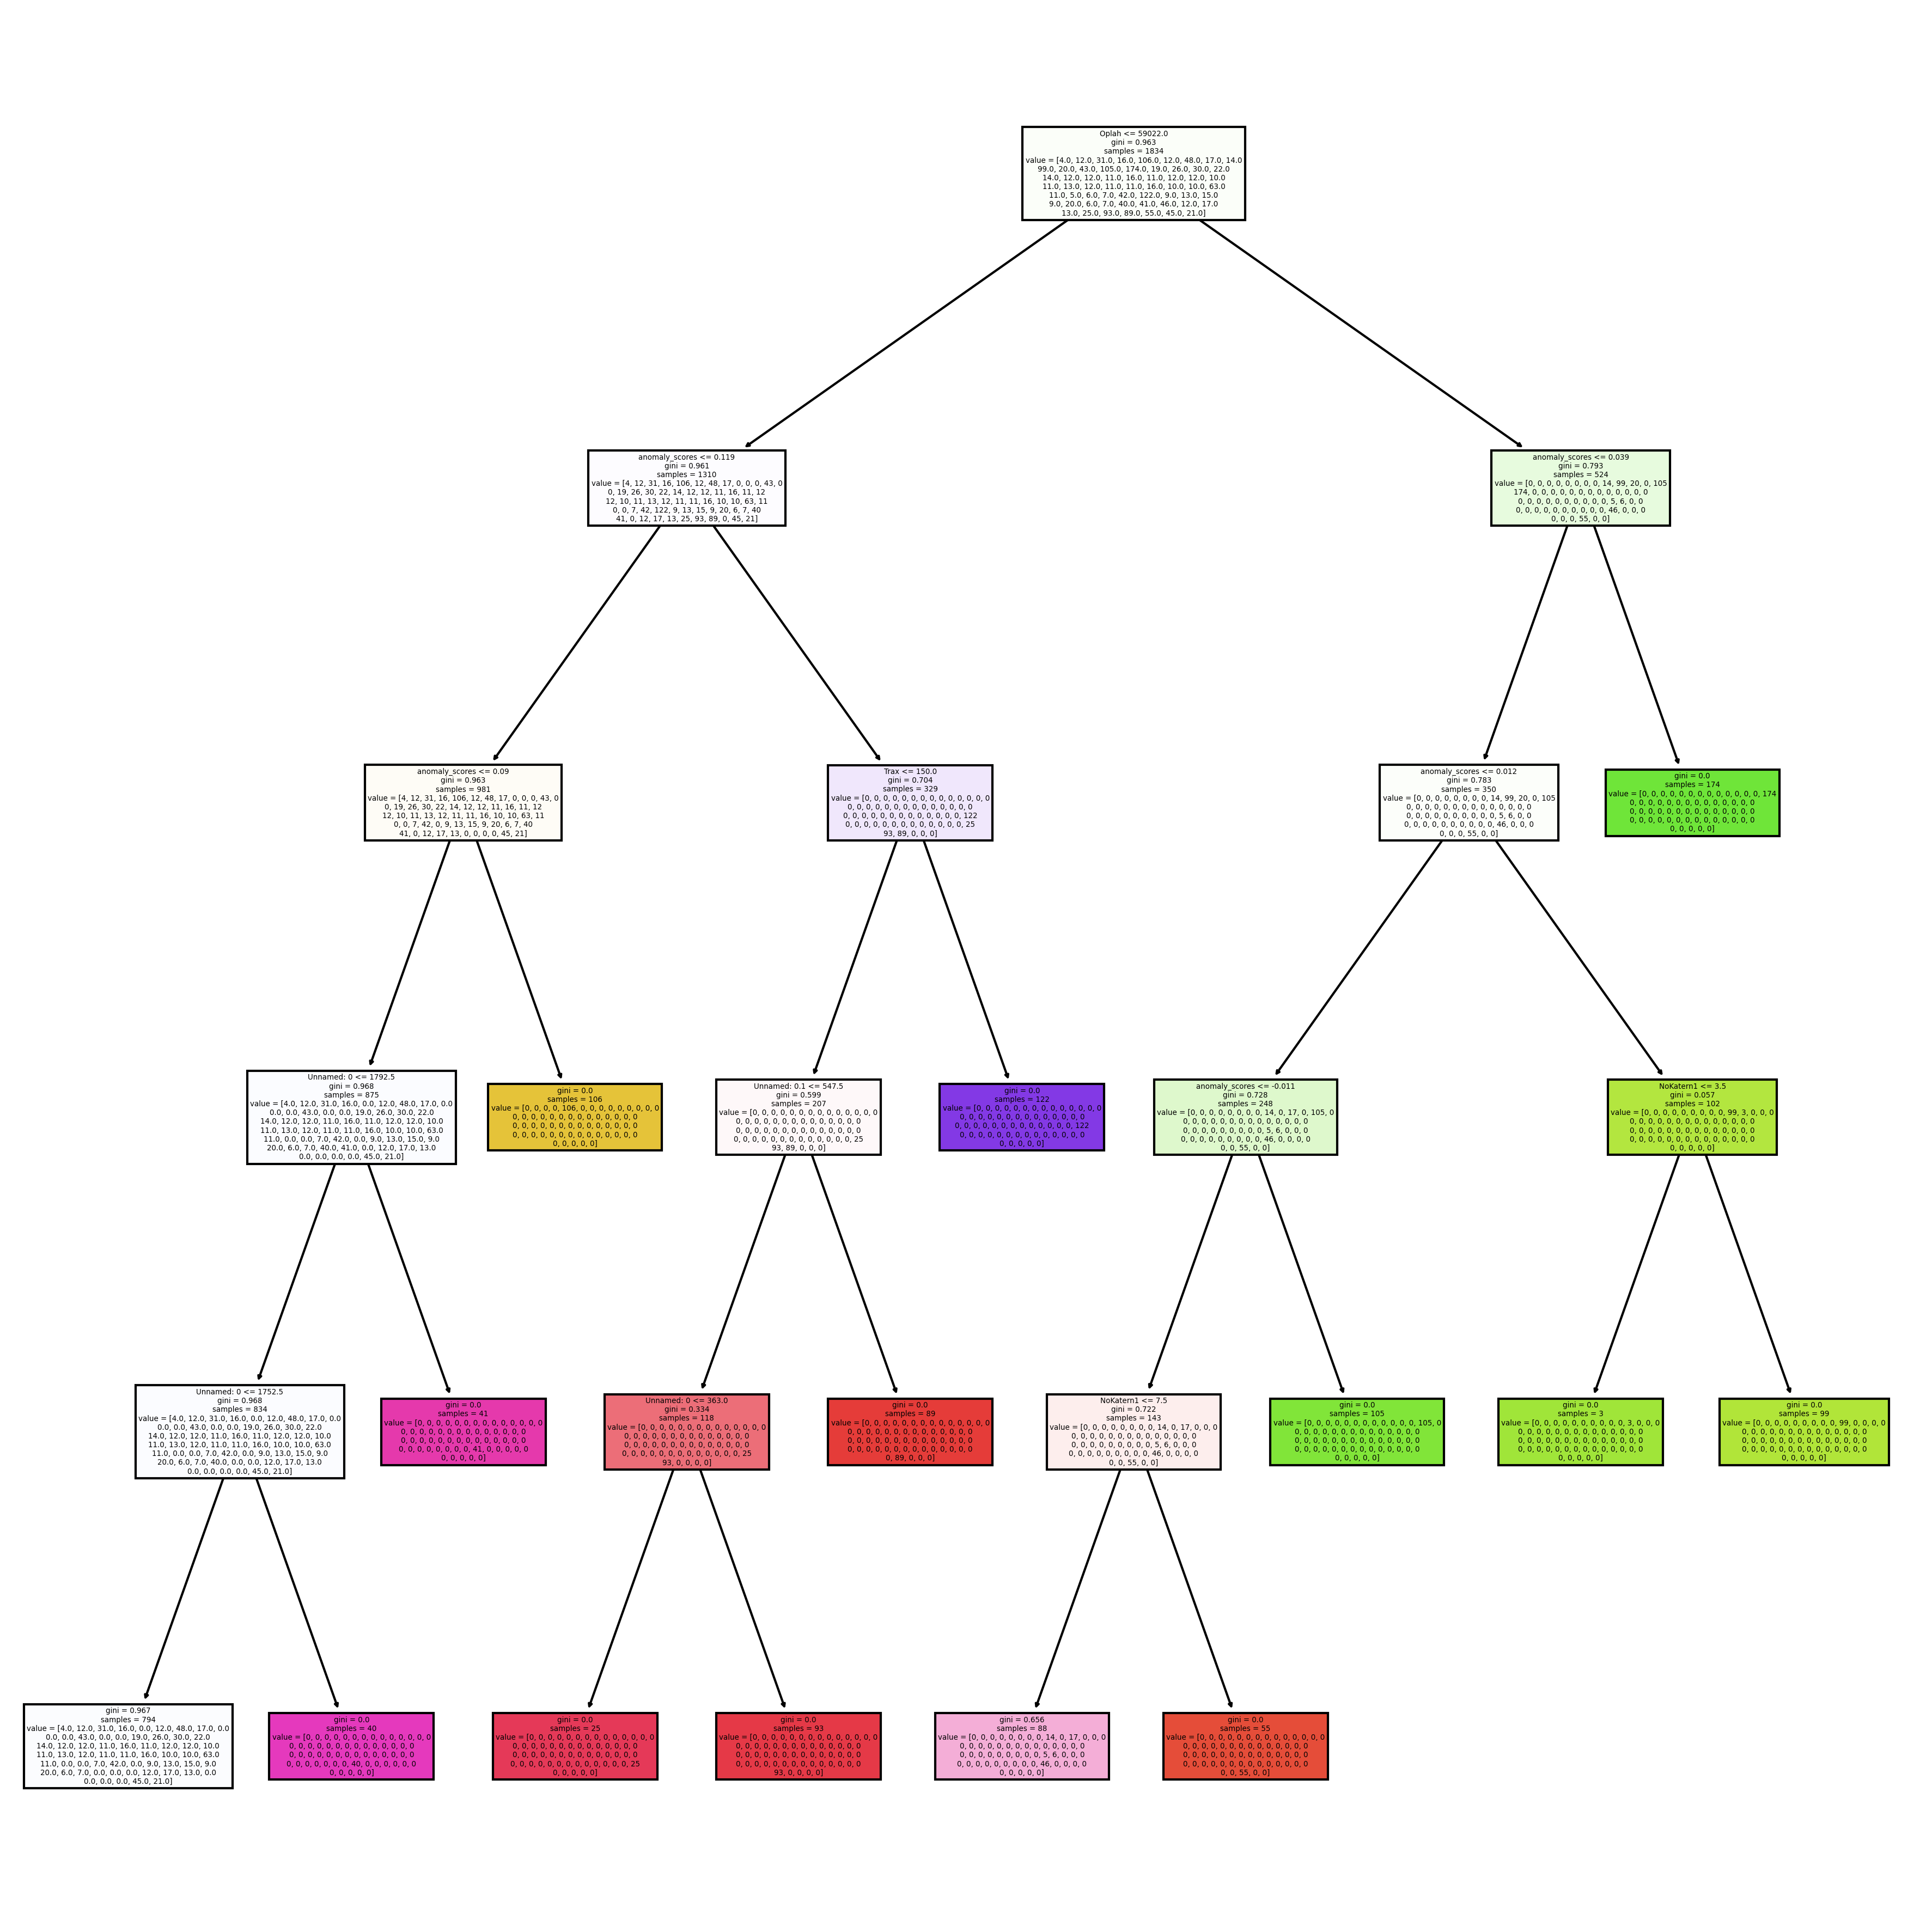

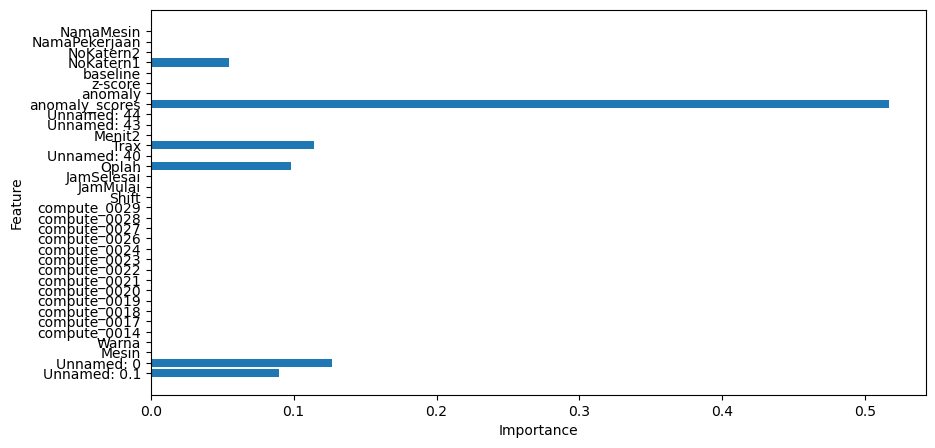

In [78]:
import sklearn.tree as tree

plt.figure(figsize=(15,15), dpi = 300)
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

plt.figure(figsize=(10,5))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [80]:
df_raw.drop(['compute_0014','NoKatern1','NoKatern2'], axis="columns", inplace=True)

In [81]:
categorical_col = []
for column in df_raw.columns:
    if df_raw[column].dtype == object and len(df_raw[column].unique()) <= 2000:
        categorical_col.append(column)
        
df['Judul'] = df_raw.Judul.astype("category").cat.codes

categorical_col.remove('Judul')

In [82]:
categorical_col

[]

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0.1       1834 non-null   int64         
 1   Unnamed: 0         1834 non-null   int64         
 2   Mesin              1834 non-null   int64         
 3   KodePekerjaan      1834 non-null   int64         
 4   NoOrder            1834 non-null   int64         
 5   Warna              1834 non-null   int64         
 6   Teller             215 non-null    float64       
 7   HasilRusak         0 non-null      float64       
 8   compute_0014       1834 non-null   int64         
 9   compute_0017       0 non-null      float64       
 10  compute_0018       0 non-null      float64       
 11  compute_0019       0 non-null      float64       
 12  compute_0020       0 non-null      float64       
 13  compute_0021       0 non-null      float64       
 14  compute_

In [90]:
from sklearn.preprocessing import LabelEncoder

df_raw_new = df_raw.select_dtypes(exclude=['object'])
# df_raw_new = df_raw_new.drop(columns=['compute_0014'])
label = LabelEncoder()
for column in df_raw_new:
    df_raw_new[column] = label.fit_transform(df_raw_new[column])

In [91]:
# categorical_col
# for col in df_raw_new.columns[:]:
#     print(col)
#     print(df_raw_new[col].unique())
#     print()

In [92]:
# df_raw[column]wwwwwwwwwwwww[qd ]

In [93]:
from sklearn.model_selection import train_test_split

X = df_new.drop('Judul', axis=1)
y = df_raw.Judul

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [95]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.72%
_______________________________________________
CLASSIFICATION REPORT:
           Product 1  Product 10  Product 11  Product 12  Product 14  \
precision        1.0         0.0    0.434783         0.0         1.0   
recall           1.0         0.0    1.000000         0.0         1.0   
f1-score         1.0         0.0    0.606061         0.0         1.0   
support          4.0         9.0   20.000000         8.0        70.0   

           Product 16  Product 18  Product 19  Product 2  Product 20  ...  \
precision         0.0         1.0         0.0        1.0         1.0  ...   
recall            0.0         1.0         0.0        1.0         1.0  ...   
f1-score          0.0         1.0         0.0        1.0         1.0  ...   
support           9.0        39.0        14.0       13.0        72.0  ...   

           Product 62  Product 63  Product 64  Product 65  Product 7  \
precision         0.0         1.0         1.0         1.0        1.0   
r

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\s

In [96]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# params = {
#     "criterion":("gini", "entropy"), 
#     "splitter":("best", "random"), 
#     "max_depth":(list(range(1, 20))), 
#     "min_samples_split":[2, 3, 4], 
#     "min_samples_leaf":list(range(1, 20)), 
# }


# tree_clf = DecisionTreeClassifier(random_state=42)
# tree_cv = GridSearchCV(
#     tree_clf, 
#     params, 
#     scoring="f1", 
#     n_jobs=-1, 
#     verbose=1, 
#     cv=5
# )

# tree_cv.fit(X_train, y_train)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")

# tree_clf = DecisionTreeClassifier(**best_params)
# tree_clf.fit(X_train, y_train)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [97]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df_new.columns)
features.remove("Judul")

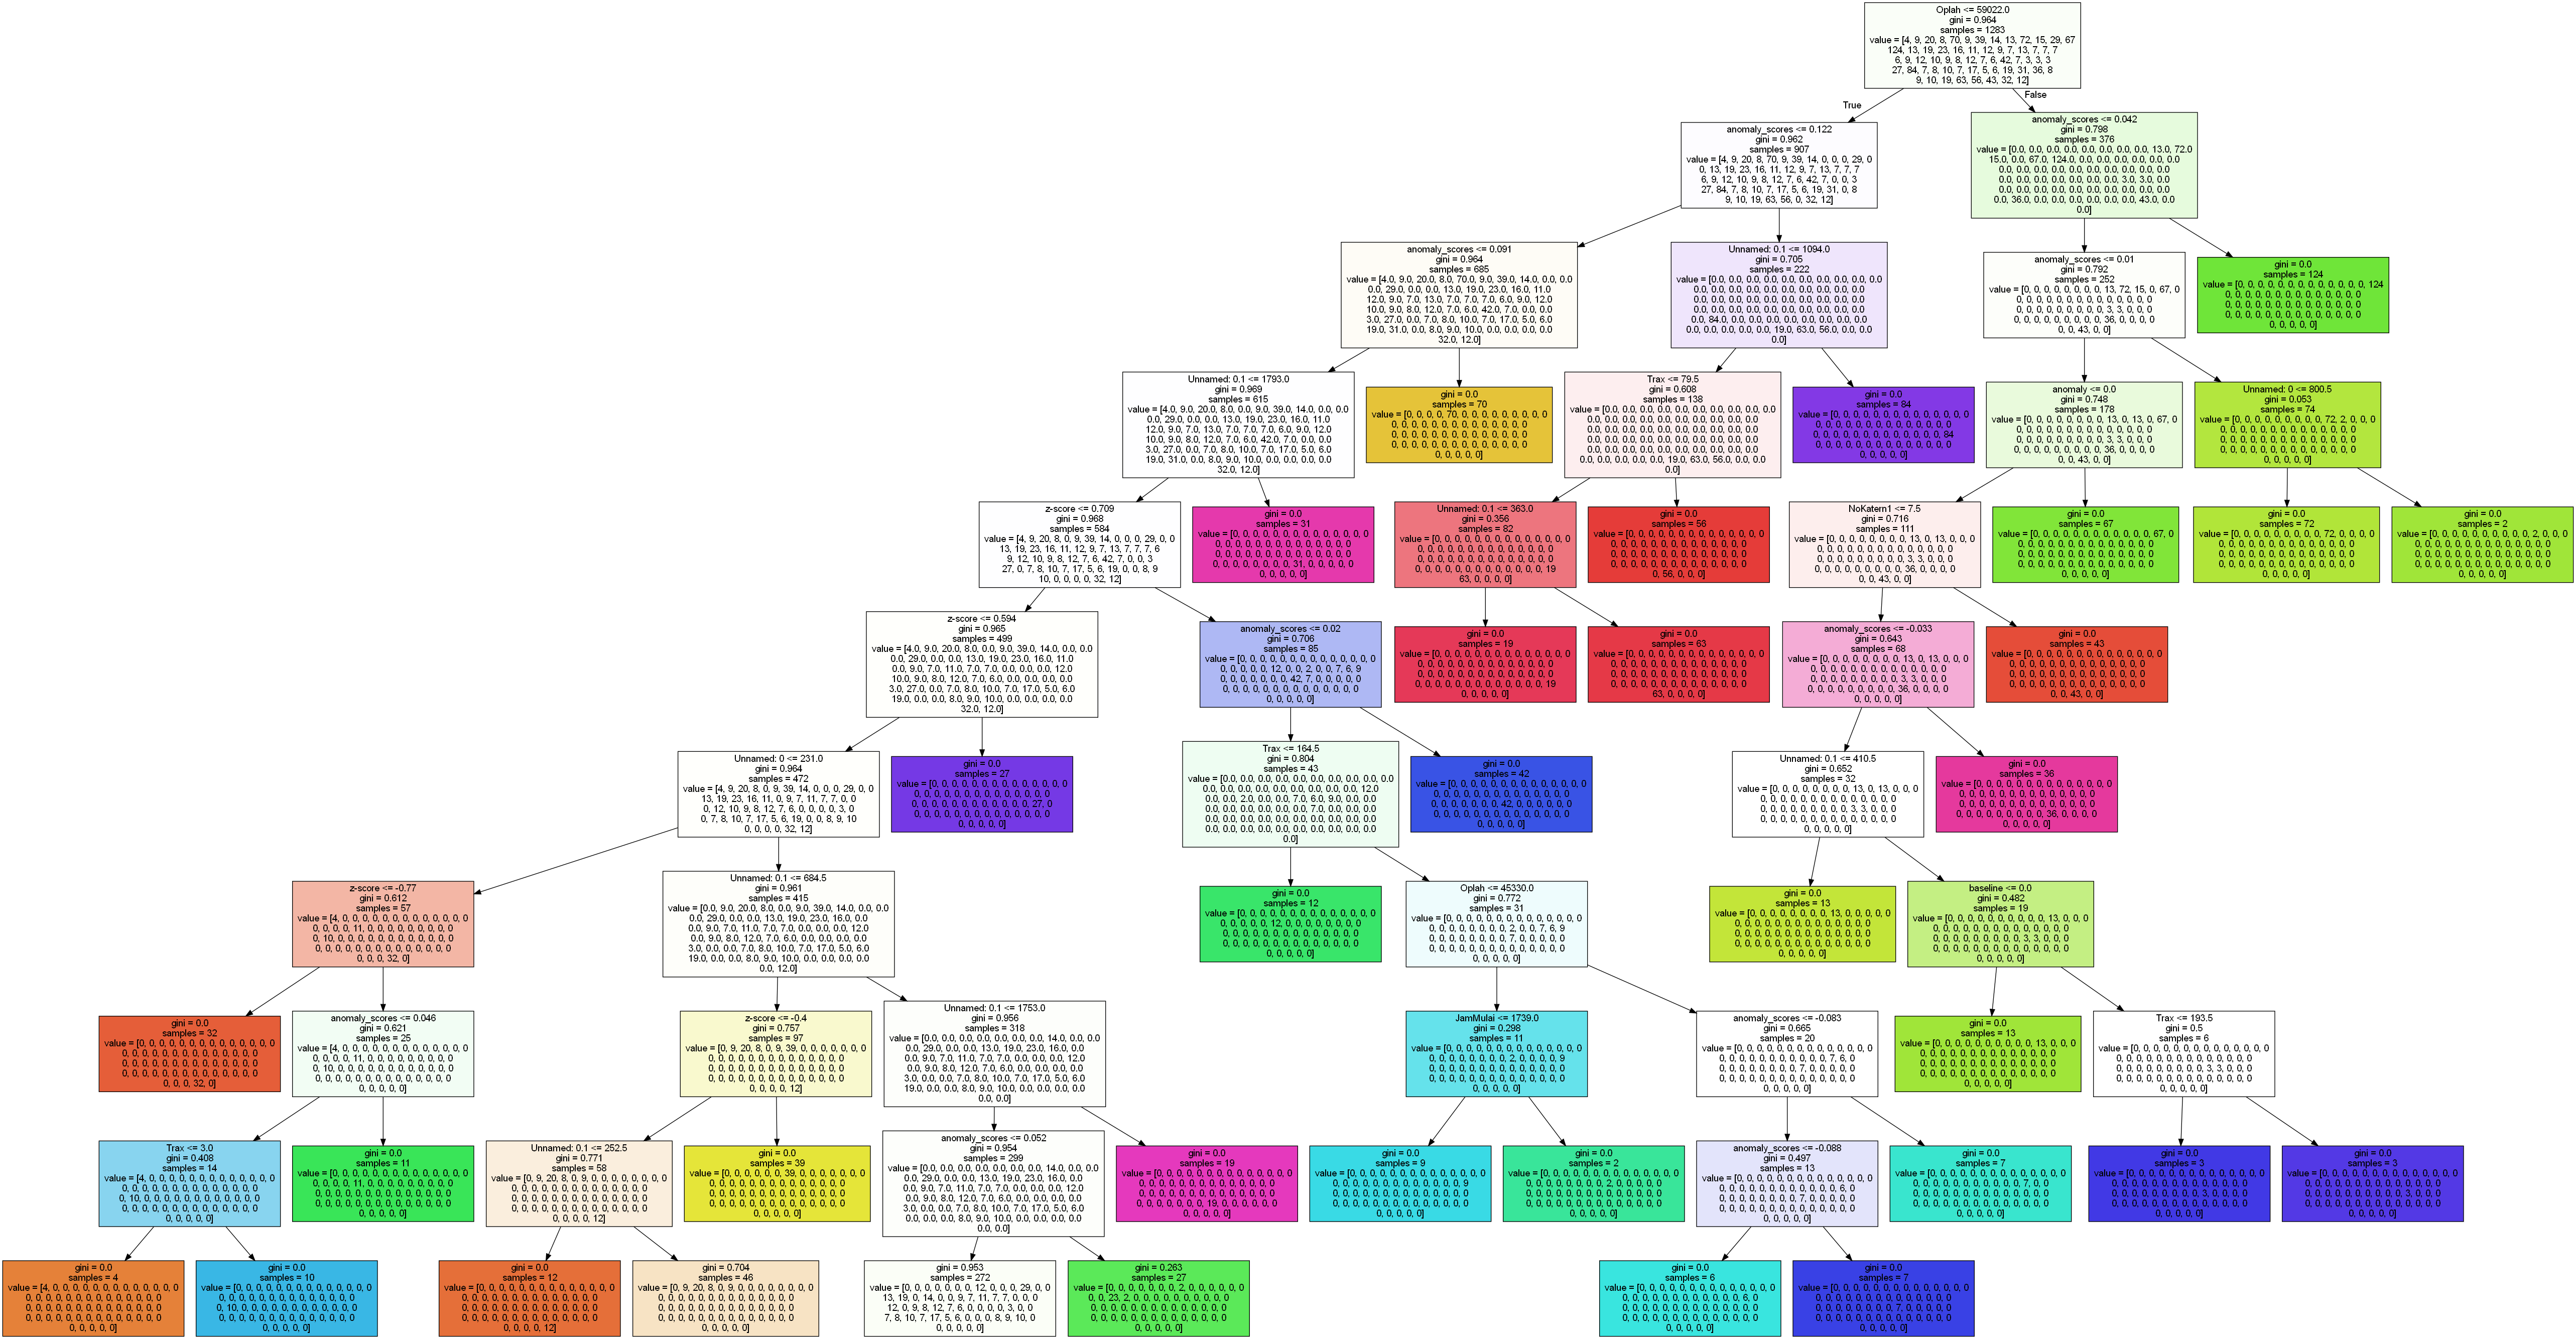

In [98]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
# graph[0].write_png('D:/bckup hdd lama/Kuliah/Semester 6/tree.png')

In [99]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [100]:
features

['Unnamed: 0.1',
 'Unnamed: 0',
 'Mesin',
 'Warna',
 'compute_0014',
 'compute_0017',
 'compute_0018',
 'compute_0019',
 'compute_0020',
 'compute_0021',
 'compute_0022',
 'compute_0023',
 'compute_0024',
 'compute_0026',
 'compute_0027',
 'compute_0028',
 'compute_0029',
 'Shift',
 'JamMulai',
 'JamSelesai',
 'Oplah',
 'Unnamed: 40',
 'Trax',
 'Menit2',
 'Unnamed: 43',
 'Unnamed: 44',
 'anomaly_scores',
 'anomaly',
 'z-score',
 'baseline',
 'NoKatern1',
 'NoKatern2',
 'NamaPekerjaan',
 'NamaMesin']

In [101]:
df_raw.rename(columns={'z-score': 'z_score'}, inplace=True)
df_raw

,Unnamed: 0.1,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,Warna,Teller,HasilRusak,NamaMesin,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z_score,baseline,is_anomaly
0,0,0,1,101,234710321,Product 1,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.021383,1,-0.272161,1,1
1,1,1,1,48,234710321,Product 1,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.021383,1,-0.272161,1,1
2,2,2,1,0,234710321,Product 1,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.021383,1,-0.272161,1,1
3,3,3,1,0,234710321,Product 1,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.021383,1,-0.272161,1,1
4,4,4,1,100,234720752,Product 2,20,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.273694,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1829,1829,1,1,244720360,Product 59,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.051144,1,-0.644569,1,1
1830,1830,1830,1,6,244720360,Product 59,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.051144,1,-0.644569,1,1
1831,1831,1831,1,500,244720360,Product 59,44,2100.0,NaN,0,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.051144,1,-0.644569,1,1
1832,1832,1832,1,53,244720360,Product 59,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.051144,1,-0.644569,1,1


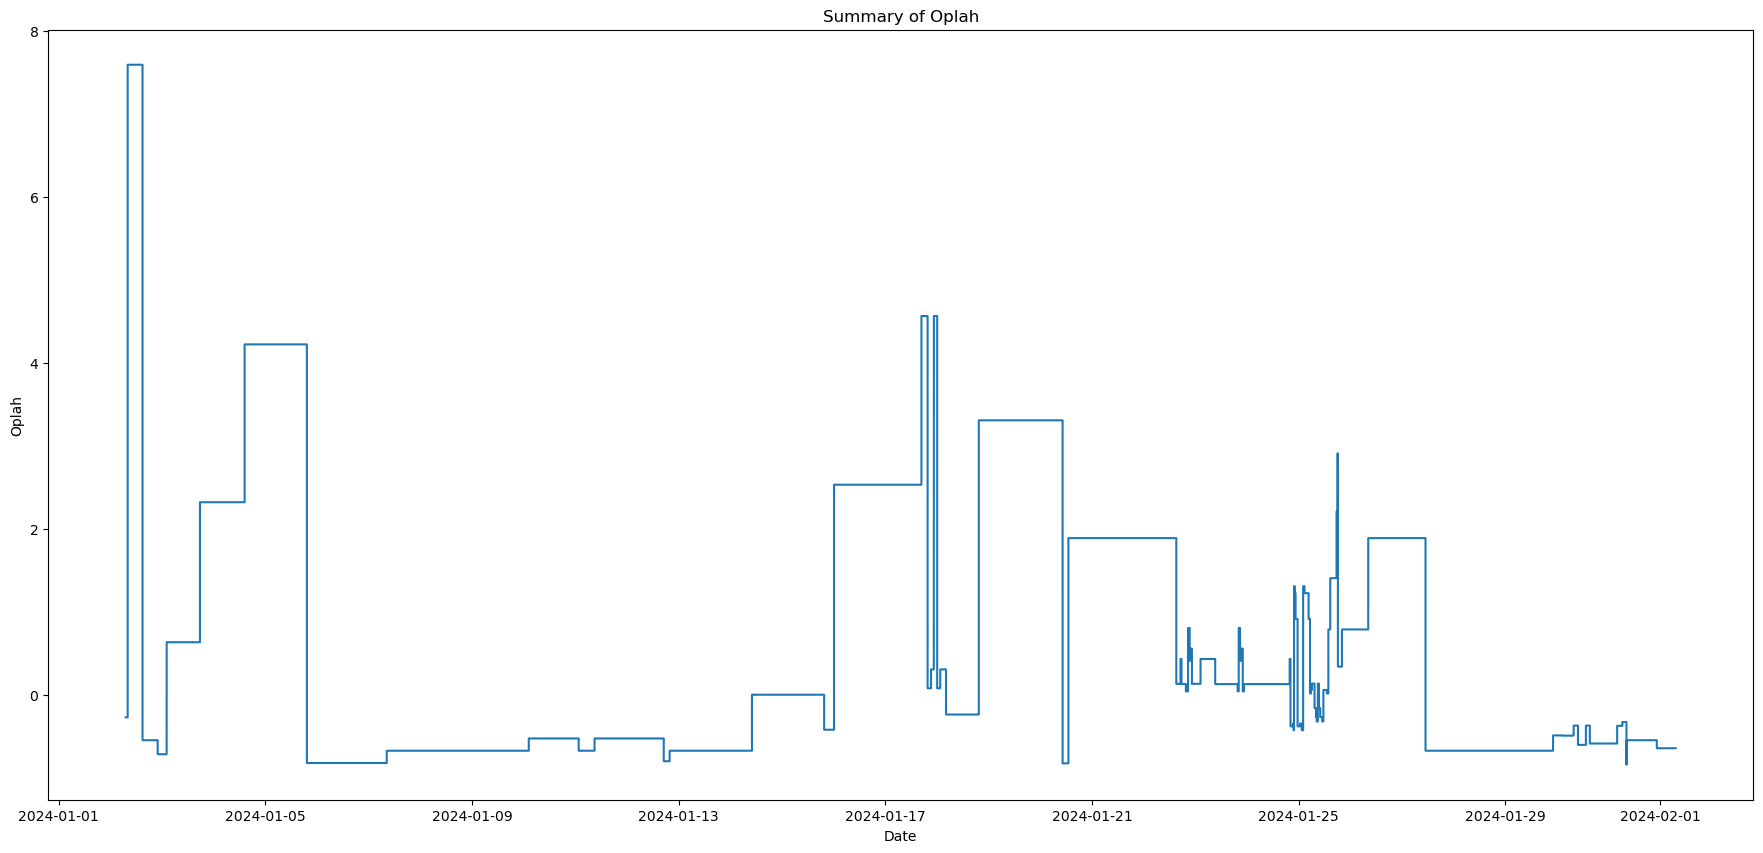

In [102]:
# df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
plt.figure(figsize=(22,10))
plt.plot(df_raw.TanggalJamSelesai,df_raw.z_score)
plt.title("Summary of Oplah")
plt.xlabel("Date")
plt.ylabel("Oplah")
plt.show()

In [103]:
# df_raw.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_proc2.xlsx")

In [104]:
df_raw.fillna(0,inplace=True)
# df_raw.to_csv('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc2.csv')

In [105]:
# # df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
# plt.figure(figsize=(22,10))
# plt.plot(df_raw.TanggalJamSelesai,df_raw.Oplah)
# plt.title("Summary of Oplah")
# plt.xlabel("Date")
# plt.ylabel("Oplah")
# plt.show()

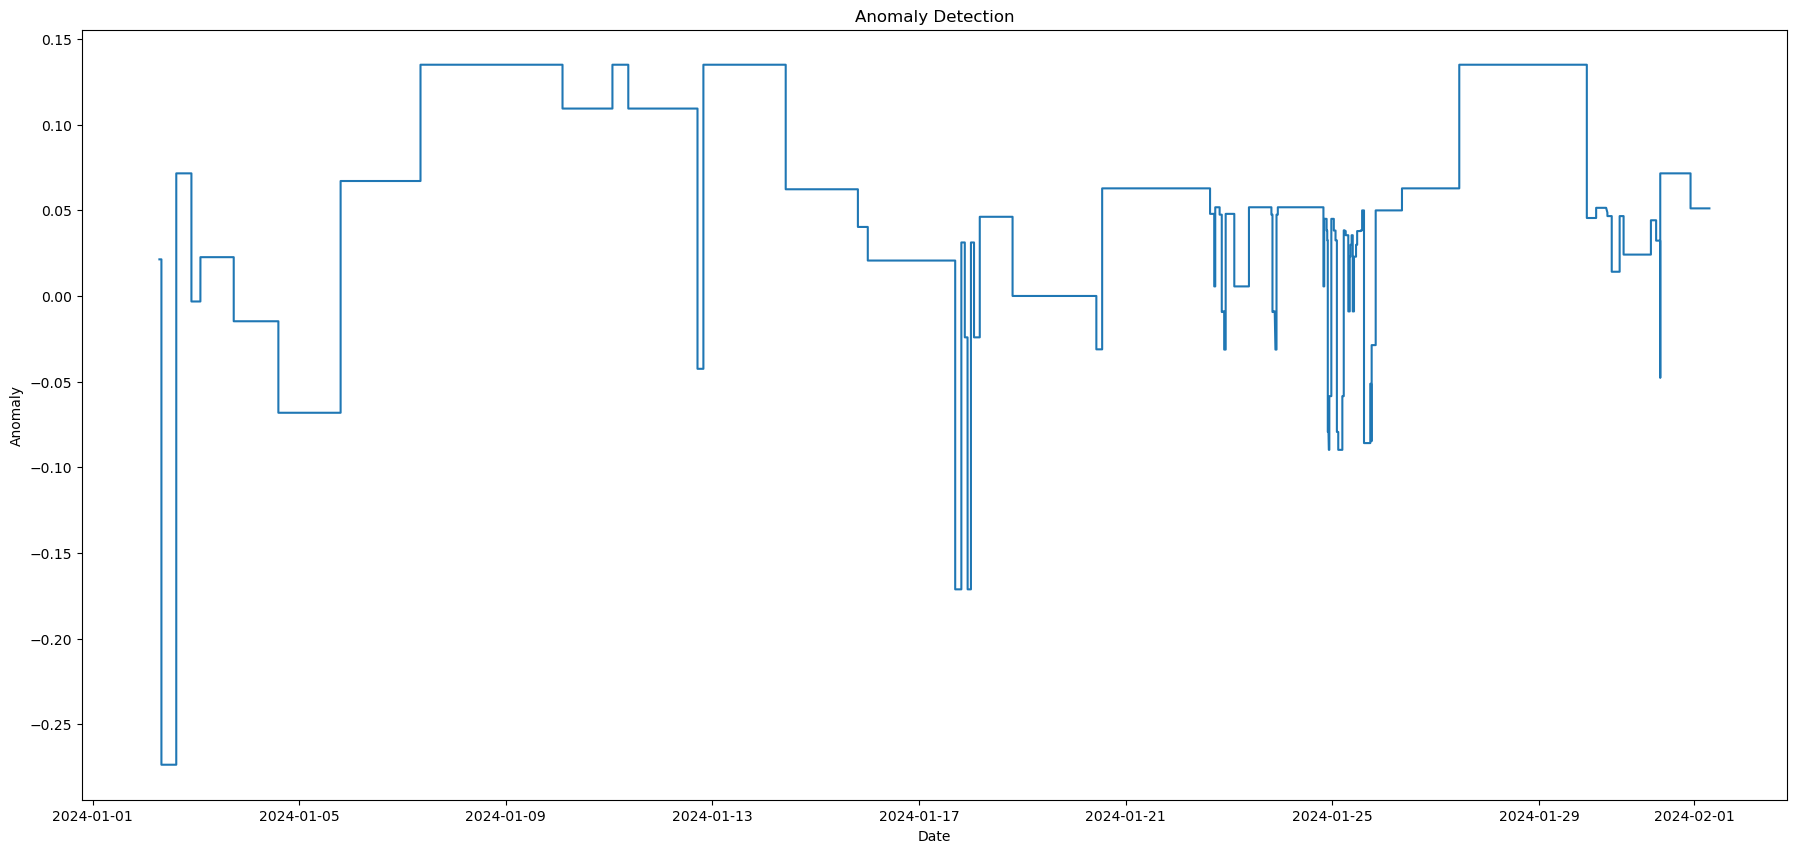

In [106]:
# df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
plt.figure(figsize=(22,10))
plt.plot(df_raw.TanggalJamSelesai,df_raw.anomaly_scores)
plt.title("Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.show()

In [107]:
# df_raw['Produksi'].sum()

In [108]:
# df_raw[df_raw.TanggalJamMulai=='2024-01-02 07:01:45']

In [109]:
# # date_range = df_raw.set_index('TanggalJamMulai')
# df_raw['TanggalJamMulai'].loc['2024-01-02 07:01:45':'2024-05-02 23:23:18']
# date_range

In [110]:
# start_date = '2024-01-02 07:01:45'
# end_date = '2024-05-02 23:23:18'
# mask = (df_raw['TanggalJamMulai'] > start_date) & (df_raw['TanggalJamMulai'] <= end_date) 
  
# dff = dff.loc[mask] 
# display(dff) 

In [112]:
# df_final = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/01_KBA24_proc2.xlsx")
# df_final

In [113]:
# df_final2 = df_final.apply(lambda x: x.replace({
#     "MAJALAH MPA EDISI JANUARI 2024":"Product 1", 
#     "BUKU YASIN 128 PB NB GOLD DES '23":"Product 2",
#     "MAJALAH INSAN MANDIRI ED. JANUARI 2024" : "Product 3",
#     "GAI0102 PEND. AG.ISLAM & BUDI KLS 1 SM 2" : "Product 4",
#     "BUKU YASIN 128 PB NB BIRU SEPT '23" : "Product 5",
#     "BK YASIN 128 BLOK PB HIJAU DES '23" : "Product 6",
#     "ALFA MART DC SURABAYA ED. 02" : "Product 7",
#     "BUMI, AYO BANGUN!" : "Product 8",
#     "NAMA KAIN NENEK" : "Product 9",
#     "BIMO SENANG MENGGAMBAR" : "Product 10",
#     "RAHASIA KOTAK MERAH" : "Product 11",
#     "CUT NYAK MEUTIA PAHLAWANKU" : "Product 12",
#     "TK & PAUD SIAP MASUK SD ( REMORA )" : "Product 13",
#     "CMN MPB & MAP FEBRUARI 2024" : "Product 14",
#     "TK&PAUD MENULIS HURUF HIJAIYAH (REMORA)" : "Product 15",
#     "KALENDER MEJA PT MMM 2024" : "Product 16",
#     "TK&PAUD LANCARMNLIS HURUF&ANGKA (REMORA)" : "Product 17",
#     "AL-QUR'AN KHAT ASY-SYIFA GARIS A4" : "Product 18",
#     "AL-QUR'AN GARIS AR RAHMAN B5" : "Product 19",
#     "BUKU YASIN 144 NB GOLD PB NOV '23" : "Product 20",
#     "SS DPRD PROV SULAWESI BARAT 4" : "Product 21",
#     "SAHABAT ANAS EDISI 151 FEBRUARI 2024" : "Product 22",
#     "ALFA MART DC SURABAYA ED. 03" : "Product 23",
#     "ALFA MIDI ED. 03 MAKASAR (NON BRANDING)" : "Product 24",
#     "YATIM MANDIRI ED. FEBRUARI 2024" : "Product 25",
#     "SS DPRD KAB KOLAKA TIMUR 1" : "Product 26",
#     "SS DPRD KAB KOLAKA TIMUR 2" : "Product 27",
#     "SS DPRD KAB KOLAKA TIMUR 3" : "Product 28",
#     "SS DPRD KAB KOLAKA TIMUR 4" : "Product 29",
#     "SS DPRD KAB KOLAKA UTARA 1" : "Product 30",
#     "SS DPRD KAB KOLAKA UTARA 2" : "Product 31",
#     "SS DPRD KAB KOLAKA UTARA 3" : "Product 32",
#     "SS DPRD KAB KONAWE KEPULAUAN 1" : "Product 33",
#     "SS DPRD KAB KONAWE KEPULAUAN 2" : "Product 34",
#     "SS DPRD KAB KONAWE KEPULAUAN 3" : "Product 35",
#     "SS DPRD KOTA KENDARI 2" : "Product 36",
#     "SS DPRD KOTA KENDARI 3" : "Product 37",
#     "SS DPRD KOTA KENDARI 4" : "Product 38",
#     "SS DPRD KAB MUNA BARAT 1" : "Product 39",
#     "SS DPRD KAB WAKATOBI 1" : "Product 40",
#     "SS DPRD KAB WAKATOBI 2" : "Product 41",
#     "SS DPRD KAB WAKATOBI 3" : "Product 42",
#     "SS DPRD KAB WAKATOBI 4" : "Product 43",
#     "SS DPRD KAB WAKATOBI 5" : "Product 44",
#     "NURUL HAYAT ED. FEBRUARI  202" : "Product 45",
#     "SS DPRD KAB POLEWALI MANDAR 5" : "Product 46",
#     "SS DPRD KAB POLEWALI MANDAR 4" : "Product 47",
#     "SS DPRD KAB POLEWALI MANDAR 3" : "Product 48",
#     "SS DPRD KAB PASANGKAYU 2" : "Product 49",
#     "THE LOMBOK GUIDE ED. FEBRUARI 2024" : "Product 50",
#     "HS1227 KIMIA UNTUK SMA-MA KELAS 12" : "Product 51",
#     "HS1226 BIOLOGI UNTUK SMA-MA KELAS 12" : "Product 52",
#     "HS1205 MATEMATIKA TK LNJT UTK SMA KLS 12" : "Product 53",
#     "HS1202 B.INDO TK LNJT-CAKAP BRB.INDO 12" : "Product 54",
#     "HS1225 BHS INGGRS-LIFE TODAY SMA KLS 12" : "Product 55",
#     "HS1213 GEOGRAFI UNTUK SMA/MA KELAS 12" : "Product 56",
#     "HS1214 EKONOMI UNTUK SMA/MA KELAS 12" : "Product 57",
#     "INSAN MANDIRI ED. FEBRUARI 2024" : "Product 58",
#     "AL HAROMAIN ED. FEBRUARI 2024" : "Product 59"
# }, regex=True))
# # print("After replacing the string values of a single column:\n", df2)
# df_final2
# # df_final2.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/Data_Intern ASJ")

In [114]:
# df_final2.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/Data_Intern ASJ.xlsx")

In [115]:
# # pd.value_counts(df_final['Judul'])
# # df_final['Judul'].value_counts()
# for col in df_final.columns[1:]:
#     print(col)
#     print(df_final[col].unique())
#     print()